In [156]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer
from tqdm.auto import tqdm
from nltk.tokenize import word_tokenize
from gensim.models.fasttext import FastText

In [84]:
path = '/Users/ram/Downloads'
df = pd.read_csv(path+'/'+"IMDB Dataset.csv")
df = df[:2000]

In [85]:
# df['Status'] = df['First_name'].apply(lambda x: 'Found' if x == 'Ria' else 'Not Found') 
df['rate'] = ['1' if x == 'positive' else 0 for x in df['sentiment']]
df = df.loc[:,['review','rate']]
df.head()

,review,rate
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [86]:
def text_preprocessing(doc):
    #removes all the special characters
    doc = re.sub(r'\W', ' ', str(doc))
    
    #removes all single characters
    doc = re.sub(r'\s+[a-zA-Z]\s+',' ',doc)
    
    #removes single characters from the start
    doc = re.sub(r'\^[a-zA-Z]\s+', ' ',doc)
    
    #sub multiple spaces with single space
    doc = re.sub(r'\s+', ' ', doc,flags=re.I)
    
    #removing prefixed 'b'
    doc = re.sub('^b\s+', '',  doc)
    
    #convert to lowercase
    doc = doc.lower()
    
    #lemmatize to the root form
    tokens = doc.split()
    stemmer = PorterStemmer()
    wnl = WordNetLemmatizer()
    tokens = [wnl.lemmatize(word) for word in tokens]
    
    en_stop = set(nltk.corpus.stopwords.words("english"))
    tokens = [word for word in tokens if word not in en_stop]
    tokens = [word for word in tokens if len(word)>3]
    
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [88]:
df['clean_text'] = df['review'].apply(lambda x: text_preprocessing(x))
df.head()

,review,rate,clean_text
0,One of the other reviewers has mentioned that ...,1,reviewer mentioned watching episode hooked rig...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful spend time summer weekend si...
3,Basically there's a family where a little boy ...,0,basically family little jake think zombie clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


In [89]:
final_corpus = [text_preprocessing(sentence) for sentence in (df.clean_text) if sentence.strip() !='']

In [90]:
final_corpus[:5]

['reviewer mentioned watching episode hooked right exactly happened first thing struck brutality unflinching scene violence right word trust show faint hearted timid show pull punch regard drug violence hardcore classic word called nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never away would main appeal show fact show dare forget pretty picture painted mainstream audience forget charm forget romance mess around first episode ever struck nasty surreal ready watched developed taste accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order away well mannered middle class inmate turned prison bitch lack street skill prison experience watching become comfortable uncomfortable viewing thats touch darker side',
 'wonder

In [91]:
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_punct_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

In [75]:
word_punct_corpus[:5]

[['reviewer',
  'mentioned',
  'watching',
  'episode',
  'hooked',
  'right',
  'exactly',
  'happened',
  'first',
  'thing',
  'struck',
  'brutality',
  'unflinching',
  'scene',
  'violence',
  'right',
  'word',
  'trust',
  'show',
  'faint',
  'hearted',
  'timid',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  'violence',
  'hardcore',
  'classic',
  'word',
  'called',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focus',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'city',
  'home',
  'many',
  'aryan',
  'muslim',
  'gangsta',
  'latino',
  'christian',
  'italian',
  'irish',
  'scuffle',
  'death',
  'stare',
  'dodgy',
  'dealing',
  'shady',
  'agreement',
  'never',
  'away',
  'would',
  'main',
  'appeal',
  'show',
  'fact',
  'show',
  'dare',
  'forget',
  'pretty',
  'picture',
  'pai

In [92]:
#create word representations using fasttext
#divide the hyperparameters for the fast text model
embedding_size = 60
window_size = 40
min_word = 5
down_sampling = 1e-2

In [93]:
#train the fast text for word representation
# %%time
ft_model = FastText(word_punct_corpus,
                    size = embedding_size,
                    window = window_size,
                    min_count = min_word,
                    sample = down_sampling,
                    sg=1,
                    iter=100)

In [96]:
print(ft_model.wv['character'])

[ 5.42899370e-01 -1.27240464e-01 -1.19834449e-02 -1.93715572e-01
 -2.36306265e-02  1.26914933e-01  3.28578323e-01 -6.40130192e-02
 -1.65954322e-01  1.15426905e-01  2.83988357e-01  1.44980568e-02
  7.32911378e-02 -4.48391438e-02 -1.46663412e-01 -5.95896952e-02
 -1.82892591e-01  9.47630182e-02  8.37659910e-02 -4.70452756e-02
  3.02467138e-01  2.13309839e-01 -3.08059884e-04  3.14355940e-01
 -9.93594006e-02  2.64013529e-01  2.63527483e-02 -4.08562720e-02
 -3.66883576e-02  2.02785265e-02  3.15333307e-01 -3.60998022e-03
 -2.96817452e-01  1.39599279e-01 -1.22885615e-01  5.47408499e-02
 -3.21556516e-02  6.38422072e-02 -1.72224611e-01 -2.00536668e-01
  7.89197534e-02 -1.38564110e-01  1.68122143e-01  1.00857839e-01
 -1.88000798e-01 -8.27613100e-02  2.70792209e-02  2.87628978e-01
  1.14881270e-01  9.24933925e-02 -8.77017304e-02  2.34750122e-01
  1.38145670e-01  6.47265092e-03  2.39891514e-01  1.16191953e-01
  2.94276386e-01 -2.45810419e-01 -1.90990735e-02  1.45207033e-01]


In [ ]:
#find most similar words by words character

semantically_similar_words = 

In [134]:
# semantically_similar_words = set()
semantically_similar_words = {words : [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
       for words in ['reviewer','character','classic','money','kill']}

for k,v in semantically_similar_words.items():
    print(str(k)+' : '+str(v))

reviewer : ['review', 'viewer', 'overseas', 'fitting', 'commented']
character : ['main', 'story', 'however', 'good', 'even']
classic : ['many', 'original', 'well', 'film', 'like']
money : ['wasted', 'waste', 'would', 'dollar', 'hate']
kill : ['killed', 'killing', 'find', 'revenge', 'stop']


In [119]:
print(semantically_similar_words)

{'money', 'kill', 'reviewer', 'classic', 'character'}


In [150]:
#each word in our model is represented as 60dim vector we can use PCA analysis technique to find two PCA.
#The PCA can then be used to plot the words in a two dimentional space.
from sklearn.decomposition import PCA

In [151]:
all_similar_words = sum([[k] + v for k,v in semantically_similar_words.items()], [])

In [161]:
len(all_similar_words)

30

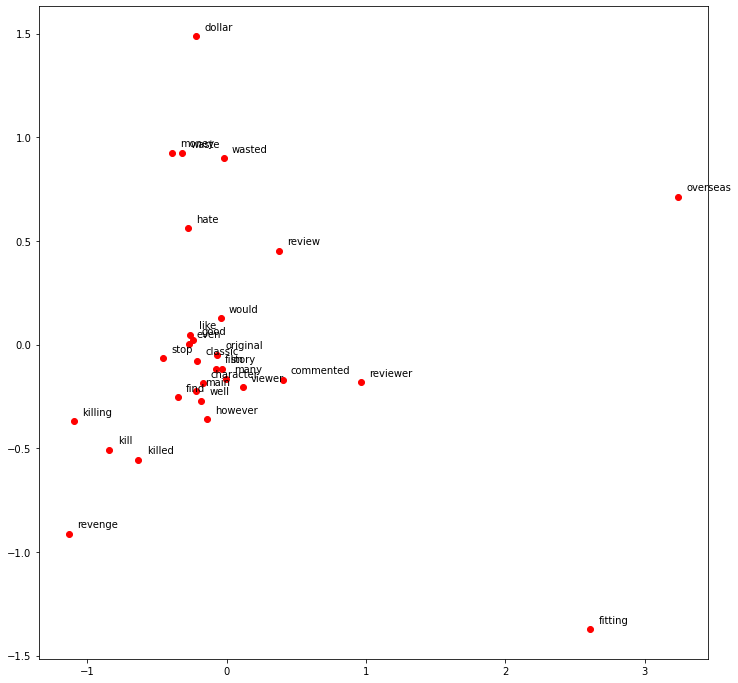

In [163]:
word_vectors = ft_model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(12,12))
plt.scatter(p_comps[:,0], p_comps[:,1], c='red')

for word_names,x,y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0,0), textcoords='offset points')